### Dataset

https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset?select=shopping_trends_updated.csv

- **Customer ID** - Unique identifier for each customer
- **Age** - Age of the customer
- **Gender** - Gender of the customer (Male/Female)
- **Item Purchased** - The item purchased by the customer
- **Category** - Category of the item purchased
- **Purchase Amount (USD)** - The amount of the purchase in USD
- **Location** - Location where the purchase was made
- **Size** - Size of the purchased item
- **Color** - Color of the purchased item
- **Season** - Season during which the purchase was made
- **Review Rating** - Rating given by the customer for the purchased item
- **Subscription Status** - Indicates if the customer has a subscription (Yes/No)
- **Shipping Type** - Type of shipping chosen by the customer
- **Discount Applied** - Indicates if a discount was applied to the purchase (Yes/No)
- **Promo Code Used** - Indicates if a promo code was used for the purchase (Yes/No)
- **Previous Purchases** - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
- **Payment Method** - Customer's most preferred payment method
- **Frequency of Purchases** - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

### Problem Definition

1) **Objective:**
> Menganalisis perilaku belanja pelanggan untuk memahami faktor-faktor yang memengaruhi nilai pembelian, frekuensi transaksi, dan loyalitas pelanggan, serta mengidentifikasi peluang peningkatan penjualan melalui strategi promosi, subscription, dan personalisasi produk.

2) **Questions:**
> - Siapa segmen pelanggan utama berdasarkan usia dan gender?
> - Apakah purchase amount berbeda antar gender dan kelompok usia?
> - Item apa yang paling sering dibeli pelanggan?
> - Kategori produk apa yang paling populer di kalangan pelanggan?
> - Kategori mana yang memberikan kontribusi purchase amount terbesar?
> - Apakah diskon dan promo code berpengaruh terhadap purchase amount?
> - Apakah pelanggan subscription memiliki nilai pembelian lebih tinggi dibanding non-subscription?
> - Apakah frekuensi pembelian dan previous purchases mencerminkan loyalitas pelanggan?
> - Bagaimana hubungan review rating dengan perilaku pembelian pelanggan?
> - Metode pembayaran dan tipe pengiriman apa yang paling mendukung transaksi bernilai tinggi?

### Data Setup

In [56]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import chardet
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('./dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/shopping_trends_updated.csv


In [57]:
with open('./dataset/shopping_trends_updated.csv', 'rb') as f:
    print(chardet.detect(f.read()))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [58]:
df = pd.read_csv('./dataset/shopping_trends_updated.csv')

In [59]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


### Preprocessing

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [61]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [62]:
df.duplicated().sum()

0

In [63]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [64]:
df.describe(include='object').T

,count,unique,top,freq
Gender,3900,2,Male,2652
Item Purchased,3900,25,Blouse,171
Category,3900,4,Clothing,1737
Location,3900,50,Montana,96
Size,3900,4,M,1755
Color,3900,25,Olive,177
Season,3900,4,Spring,999
Subscription Status,3900,2,No,2847
Shipping Type,3900,6,Free Shipping,675
Discount Applied,3900,2,No,2223


### EDA

#### Siapa segmen pelanggan utama berdasarkan usia dan gender?

In [65]:
df['Age'].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

In [66]:
df['Gender'].describe()

count     3900
unique       2
top       Male
freq      2652
Name: Gender, dtype: object

In [67]:
bins = [0, 20, 35, 50, 100]
labels = ['<20', '20-35', '36-50', '>50']

df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['Age_group'].describe()

count     3900
unique       4
top        >50
freq      1476
Name: Age_group, dtype: object

In [68]:
customer_segment = df.groupby(['Gender', 'Age_group'])['Customer ID'].nunique().reset_index(name='Total_customer')

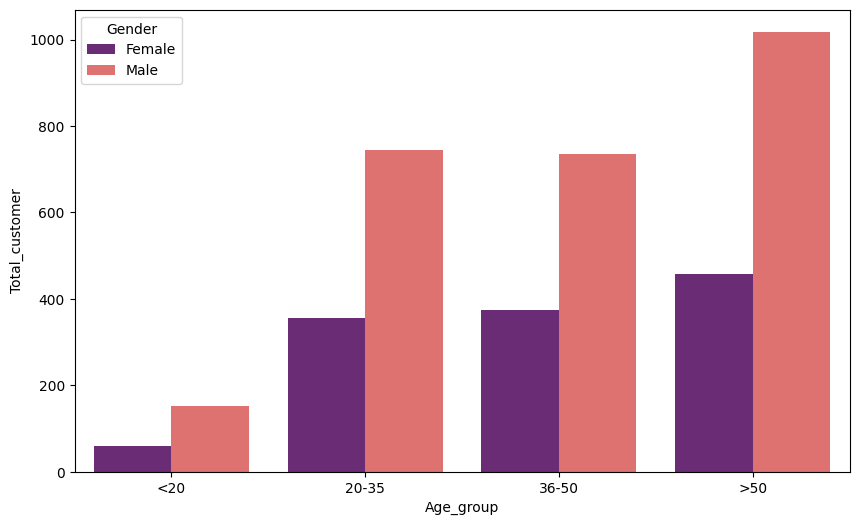

,Gender,Age_group,Total_customer
0,Female,<20,59
1,Female,20-35,356
2,Female,36-50,375
3,Female,>50,458
4,Male,<20,153
5,Male,20-35,745
6,Male,36-50,736
7,Male,>50,1018


In [69]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=customer_segment,
    x='Age_group',
    y='Total_customer',
    hue='Gender',
    palette='magma'
)
plt.show()

customer_segment

**Insight:**
> Segmen pelanggan terbanyak berasal dari kelompok usia >50 tahun dengan dominasi gender Male. Hal ini menunjukkan bahwa kelompok ini merupakan segmen pelanggan dengan jumlah terbanyak dalam dataset.

#### Apakah purchase amount berbeda antar gender dan kelompok usia?

In [70]:
df[['Age_group', 'Gender']].describe()

,Age_group,Gender
count,3900,3900
unique,4,2
top,>50,Male
freq,1476,2652


In [71]:
df['Purchase Amount (USD)'].describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

In [72]:
diff_of_purchase = df.groupby(['Gender', 'Age_group'])['Purchase Amount (USD)'].mean().reset_index()

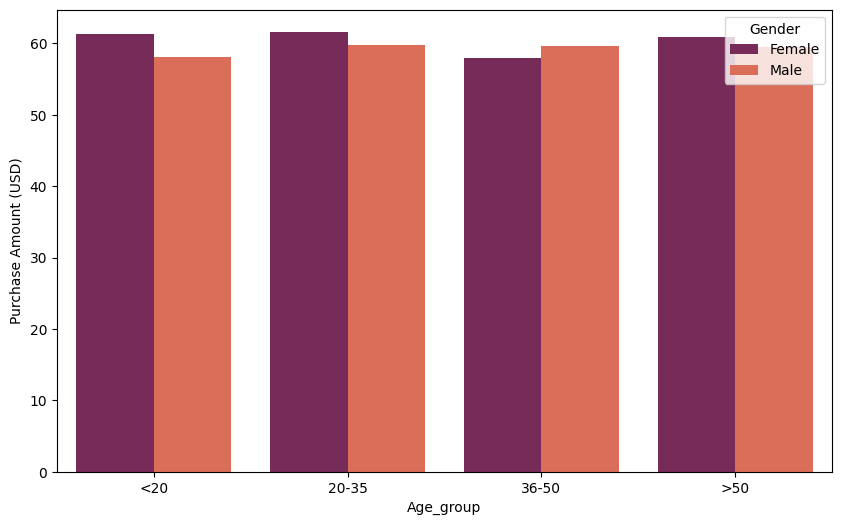

,Gender,Age_group,Purchase Amount (USD)
0,Female,<20,61.288136
1,Female,20-35,61.626404
2,Female,36-50,58.002667
3,Female,>50,60.884279
4,Male,<20,58.091503
5,Male,20-35,59.770470
6,Male,36-50,59.616848
7,Male,>50,59.523576


In [73]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=diff_of_purchase,
    x='Age_group',
    y='Purchase Amount (USD)',
    hue='Gender',
    palette='rocket'
)
plt.show()

diff_of_purchase

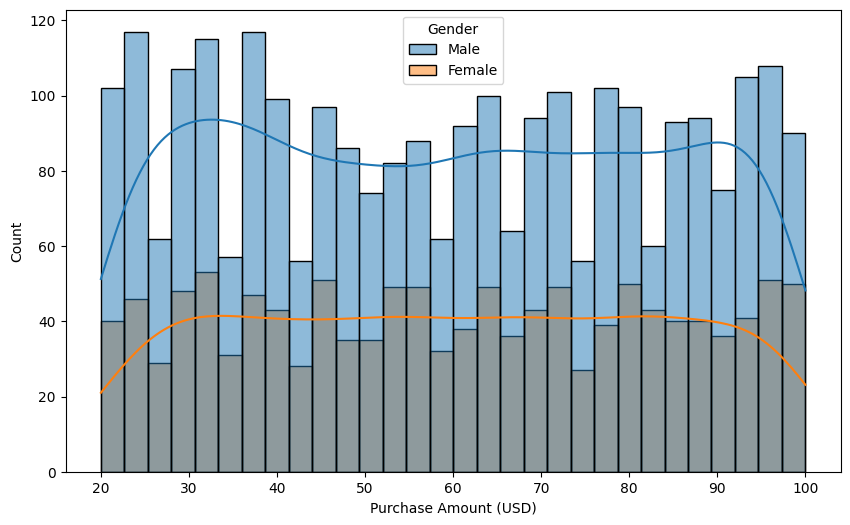

In [74]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x='Purchase Amount (USD)',
    hue='Gender',
    kde=True,
    bins = 30
)
plt.show()

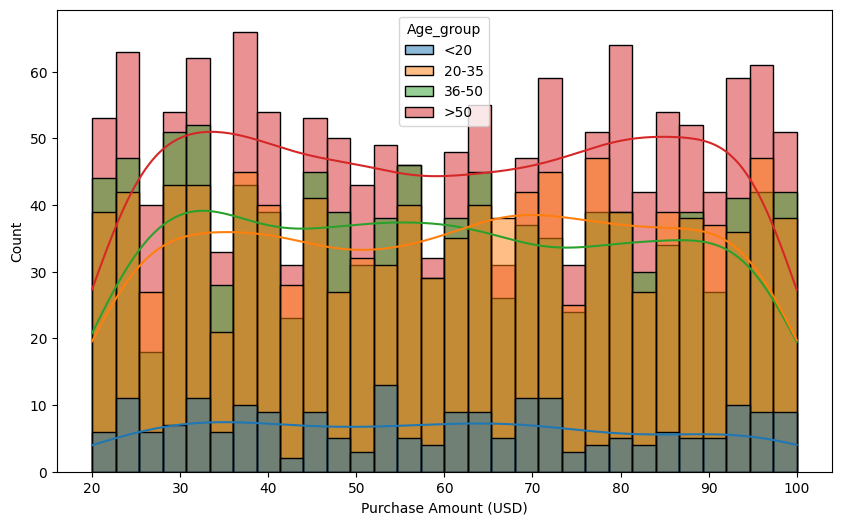

In [75]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x='Purchase Amount (USD)',
    hue='Age_group',
    kde=True,
    bins = 30
)
plt.show()

**Insight:**
> Perbedaan rata-rata purchase amount antara gender relatif kecil, dengan pelanggan Female menunjukkan nilai rata-rata yang sedikit lebih tinggi di sebagian besar kelompok usia. Namun, analisis distribusi menunjukkan bahwa pelanggan Male, khususnya pada kelompok usia >50 tahun, memiliki rentang purchase amount yang lebih lebar, menandakan adanya variasi transaksi dan potensi pembelian bernilai tinggi pada segmen tersebut.

#### Item apa yang paling sering dibeli pelanggan?

In [76]:
df['Item Purchased'].describe()

count       3900
unique        25
top       Blouse
freq         171
Name: Item Purchased, dtype: object

In [77]:
top_item = df['Item Purchased'].value_counts().sort_values(ascending=False).reset_index()
top_item.columns = ['Item Purchased', 'count']

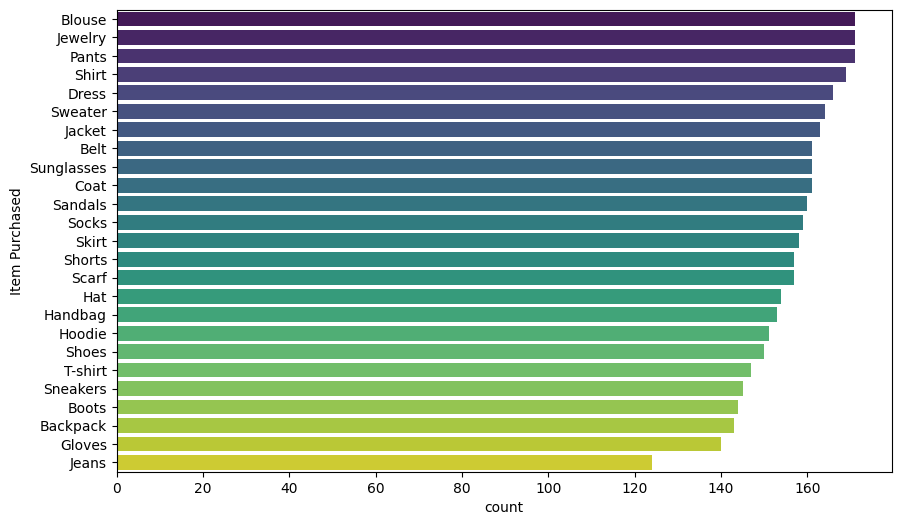

,Item Purchased,count
0,Blouse,171
1,Jewelry,171
2,Pants,171
3,Shirt,169
4,Dress,166
5,Sweater,164
6,Jacket,163
7,Belt,161
8,Sunglasses,161
9,Coat,161


In [78]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=top_item,
    x='count',
    y='Item Purchased',
    palette='viridis'
)
plt.show()

top_item

**Insight:**
> Blouse, Jewelry, dan Pants merupakan item yang paling sering dibeli pelanggan dengan jumlah pembelian tertinggi dibandingkan item lainnya. Namun, perbedaan frekuensi pembelian antar item relatif kecil, menunjukkan bahwa preferensi pelanggan cukup tersebar di berbagai jenis produk dan tidak terpusat pada satu item tertentu.

#### Kategori produk apa yang paling populer di kalangan pelanggan?

In [79]:
df['Category'].describe()

count         3900
unique           4
top       Clothing
freq          1737
Name: Category, dtype: object

In [80]:
top_category_gender = (
    df.groupby(['Category', 'Gender'])
      .size()
      .reset_index(name='count')
)
top_category_gender

,Category,Gender,count
0,Accessories,Female,392
1,Accessories,Male,848
2,Clothing,Female,556
3,Clothing,Male,1181
4,Footwear,Female,199
5,Footwear,Male,400
6,Outerwear,Female,101
7,Outerwear,Male,223


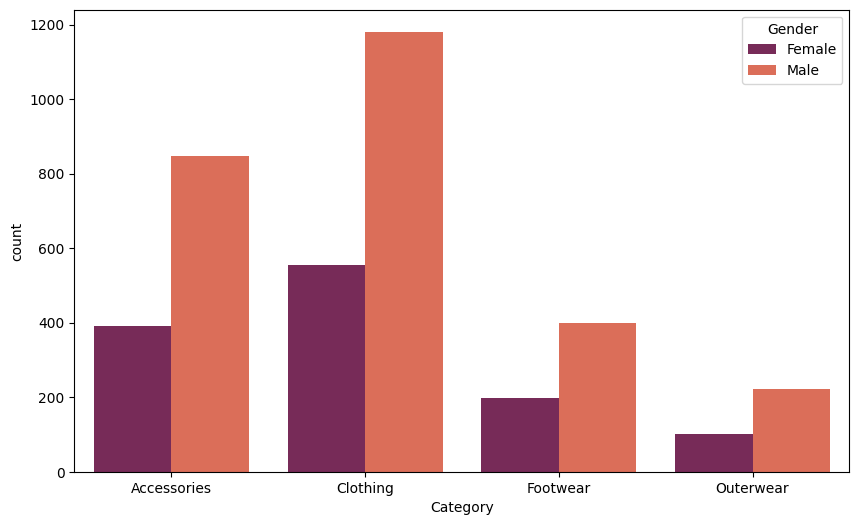

In [81]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=top_category_gender,
    x='Category',
    y='count',
    hue='Gender',
    palette='rocket'
)
plt.show()

**Insight:**
> Kategori Clothing merupakan kategori paling populer baik pada pelanggan Male maupun Female. Namun, secara keseluruhan jumlah pembelian didominasi oleh pelanggan Male di seluruh kategori produk.

> Perbedaan paling signifikan terlihat pada kategori Clothing dan Accessories, di mana jumlah pembelian oleh Male hampir dua kali lipat dibandingkan Female. Sementara itu, pada kategori Footwear dan Outerwear, meskipun volume pembelian lebih rendah, pola dominasi pelanggan Male tetap konsisten.

#### Kategori mana yang memberikan kontribusi purchase amount terbesar?

In [82]:
high_amount = (
    df.groupby('Category')
    .agg(
        total_amount = ('Purchase Amount (USD)', 'sum'),
        avg_amount = ('Purchase Amount (USD)', 'mean')
    )
)

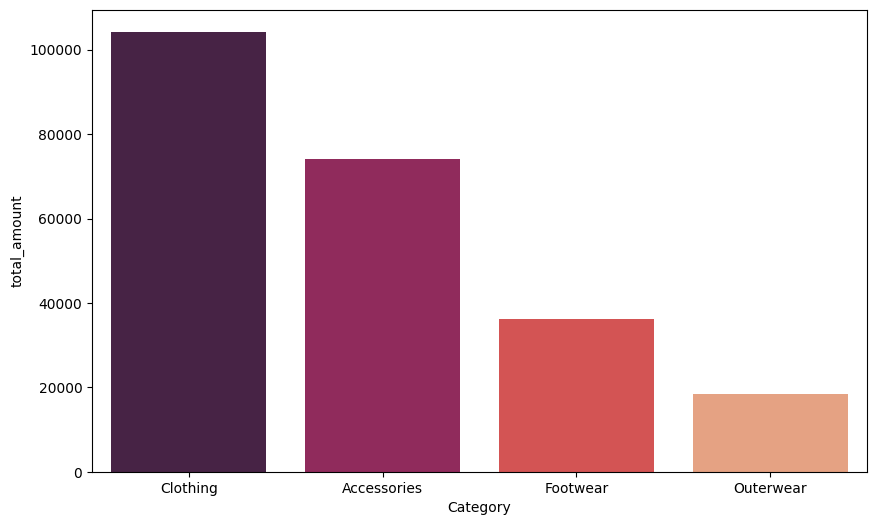

,Category,total_amount,avg_amount
0,Clothing,104264,60.025331
1,Accessories,74200,59.838710
2,Footwear,36093,60.255426
3,Outerwear,18524,57.172840


In [83]:
# total amount
plt.figure(figsize=(10,6))
total_high_amount = high_amount.sort_values('total_amount', ascending=False).reset_index()
sns.barplot(
    data=total_high_amount,
    x='Category',
    y='total_amount',
    palette='rocket'
)
plt.show()

total_high_amount

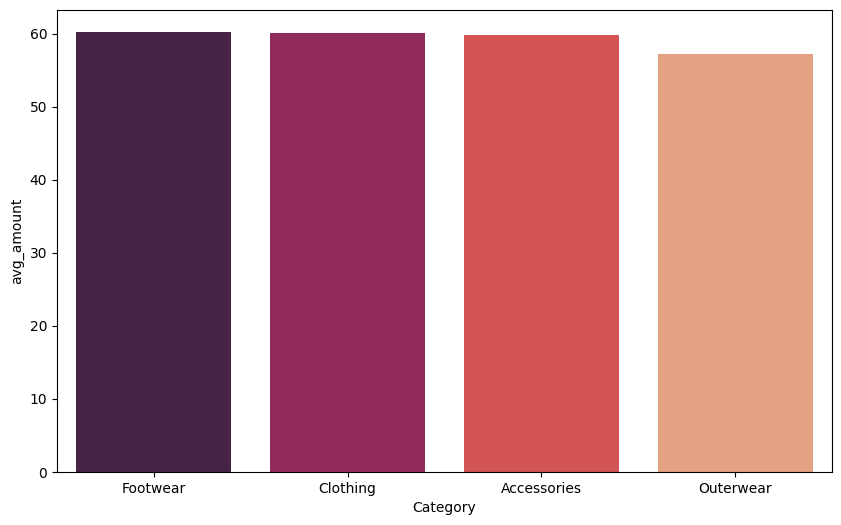

,Category,total_amount,avg_amount
0,Footwear,36093,60.255426
1,Clothing,104264,60.025331
2,Accessories,74200,59.838710
3,Outerwear,18524,57.172840


In [84]:
# total amount
plt.figure(figsize=(10,6))
avg_high_amount = high_amount.sort_values('avg_amount', ascending=False).reset_index()
sns.barplot(
    data=avg_high_amount,
    x='Category',
    y='avg_amount',
    palette='rocket'
)
plt.show()

avg_high_amount

**Insight:**
> Kategori Clothing memberikan kontribusi purchase amount terbesar secara total, menunjukkan bahwa kategori ini menjadi penyumbang utama pendapatan. Namun, dari sisi rata-rata nilai transaksi, kategori Footwear memiliki average purchase amount sedikit lebih tinggi dibandingkan Clothing, yang mengindikasikan bahwa produk Footwear cenderung dibeli dengan nilai transaksi yang lebih besar per pembelian.

#### Apakah diskon dan promo code berpengaruh terhadap purchase amount?

In [85]:
df[['Discount Applied', 'Promo Code Used']].describe()

,Discount Applied,Promo Code Used
count,3900,3900
unique,2,2
top,No,No
freq,2223,2223


In [86]:
promo_impact = df.groupby(['Discount Applied', 'Promo Code Used'])['Purchase Amount (USD)'].mean().reset_index()
promo_impact

,Discount Applied,Promo Code Used,Purchase Amount (USD)
0,No,No,60.130454
1,Yes,Yes,59.279070


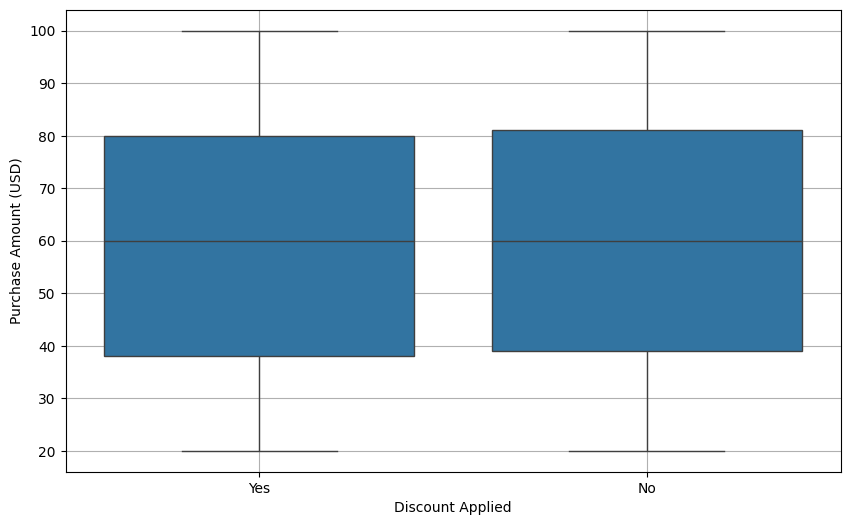

In [87]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df,
    x='Discount Applied',
    y='Purchase Amount (USD)'
)
plt.grid()
plt.show()

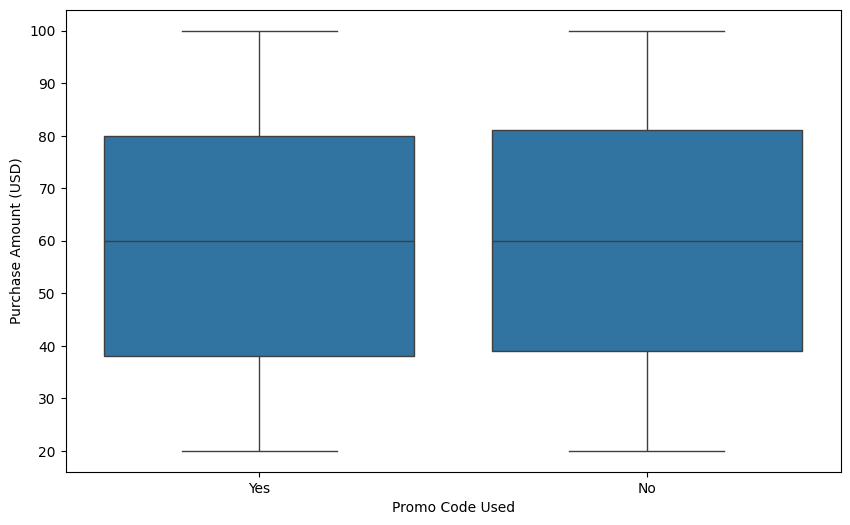

In [88]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df,
    x='Promo Code Used',
    y='Purchase Amount (USD)'
)
plt.show()

**Insight:**
> Berdasarkan hasil analisis, rata-rata purchase amount pada transaksi dengan diskon dan promo code tidak menunjukkan peningkatan dibandingkan transaksi tanpa diskon dan promo code. Perbedaan nilai rata-rata yang relatif kecil mengindikasikan bahwa diskon dan promo code tidak berpengaruh signifikan terhadap besarnya nilai transaksi, melainkan lebih berpotensi memengaruhi frekuensi pembelian.

#### Apakah pelanggan subscription memiliki nilai pembelian lebih tinggi dibanding non-subscription?

In [89]:
df['Subscription Status'].describe()

count     3900
unique       2
top         No
freq      2847
Name: Subscription Status, dtype: object

In [90]:
subscription_pct = df['Subscription Status'].value_counts(normalize=True).loc['Yes'] * 100
subscription_pct

27.0

In [91]:
subs_stats = df.groupby('Subscription Status')['Purchase Amount (USD)'].describe().T
subs_stats

Subscription Status,No,Yes
count,2847.000000,1053.000000
mean,59.865121,59.491928
std,23.775199,23.449914
min,20.000000,20.000000
25%,38.000000,39.000000
50%,60.000000,60.000000
75%,81.000000,80.000000
max,100.000000,100.000000


In [92]:
df.groupby('Subscription Status')['Purchase Amount (USD)'].mean().reset_index()

,Subscription Status,Purchase Amount (USD)
0,No,59.865121
1,Yes,59.491928


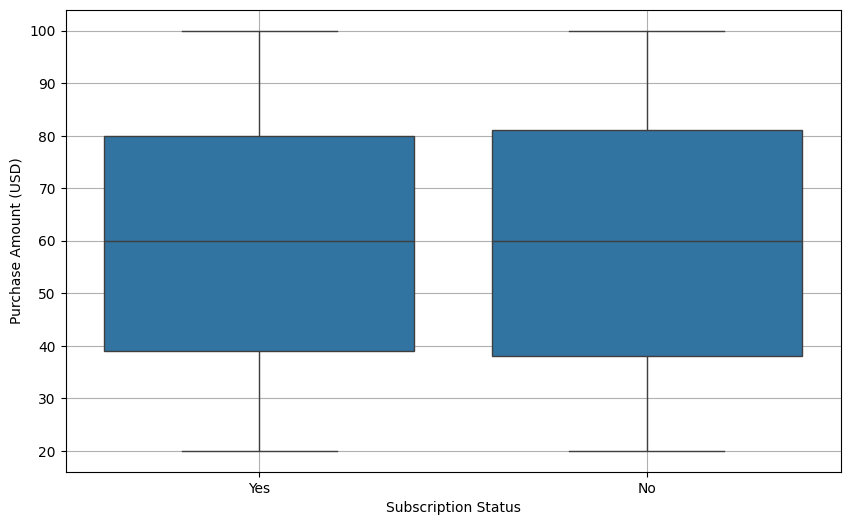

In [93]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df,
    x='Subscription Status',
    y='Purchase Amount (USD)'
)
plt.grid()
plt.show()

In [94]:
from scipy.stats import ttest_ind

sub = df[df['Subscription Status']=='Yes']['Purchase Amount (USD)']
non_sub = df[df['Subscription Status']=='No']['Purchase Amount (USD)']

ttest_ind(sub, non_sub)

TtestResult(statistic=-0.4368012420060051, pvalue=0.6622796924526246, df=3898.0)

**Insight:**
> Berdasarkan analisis deskriptif, tidak terdapat perbedaan yang berarti pada rata-rata purchase amount antara pelanggan subscription dan non-subscription. Selisih nilai rata-rata yang sangat kecil mengindikasikan bahwa status subscription tidak berpengaruh signifikan terhadap besarnya nilai pembelian per transaksi.

#### Apakah frekuensi pembelian dan previous purchases mencerminkan loyalitas pelanggan?

In [95]:
df['Frequency of Purchases'].describe()

count               3900
unique                 7
top       Every 3 Months
freq                 584
Name: Frequency of Purchases, dtype: object

In [96]:
df['Previous Purchases'].describe()

count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous Purchases, dtype: float64

In [97]:
freq_amount = df.groupby('Frequency of Purchases')['Purchase Amount (USD)'].mean().sort_values(ascending=False).reset_index()

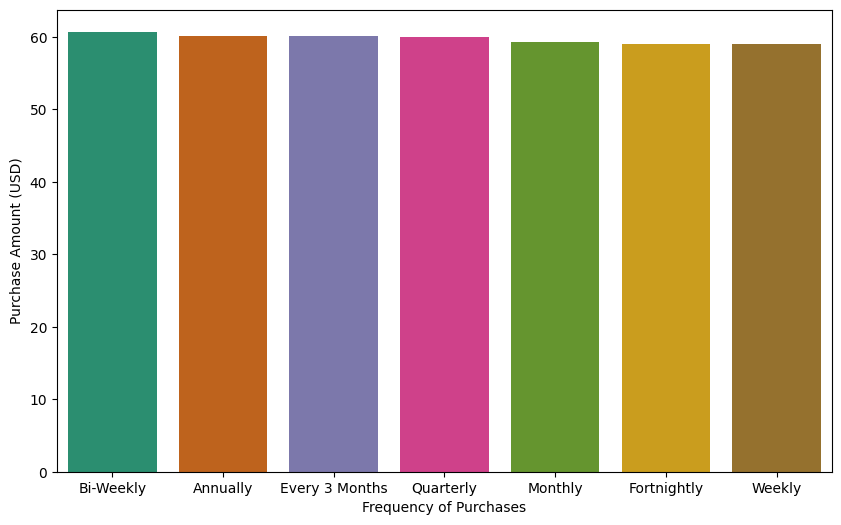

,Frequency of Purchases,Purchase Amount (USD)
0,Bi-Weekly,60.694698
1,Annually,60.173077
2,Every 3 Months,60.082192
3,Quarterly,59.984014
4,Monthly,59.330922
5,Fortnightly,59.053506
6,Weekly,58.972171


In [98]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=freq_amount,
    x='Frequency of Purchases',
    y='Purchase Amount (USD)',
    palette='Dark2'
)
plt.show()

freq_amount

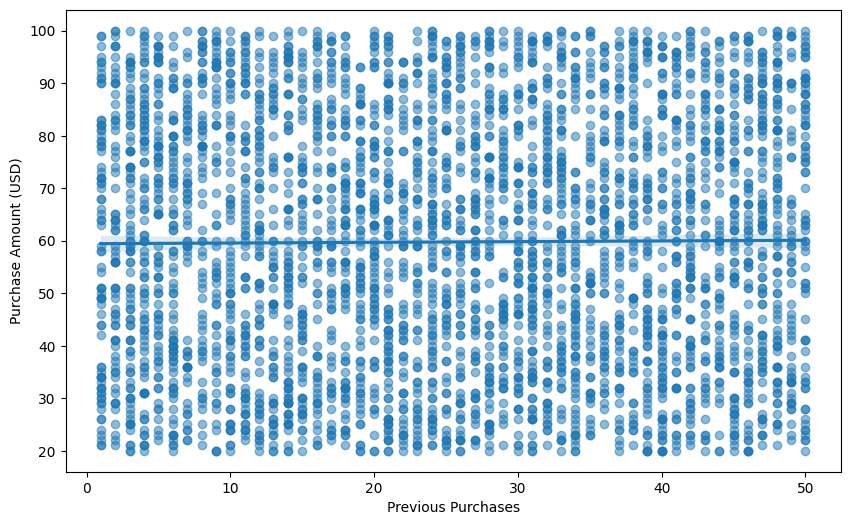

In [99]:
plt.figure(figsize=(10,6))

sns.regplot(
    data=df,
    x='Previous Purchases',
    y='Purchase Amount (USD)',
    scatter_kws={'alpha':0.5}
)
plt.show()

**Insight:**
> Berdasarkan analisis deskriptif, rata-rata purchase amount relatif seragam di seluruh kategori frekuensi pembelian, dengan perbedaan nilai yang sangat kecil antar kelompok. Hal serupa juga terlihat pada hubungan antara previous purchases dan purchase amount, di mana sebaran data cenderung merata tanpa pola tren yang jelas.

> Hal ini mengindikasikan bahwa frekuensi pembelian maupun jumlah transaksi sebelumnya belum mencerminkan loyalitas pelanggan jika diukur dari besarnya nilai pembelian per transaksi.

#### Bagaimana hubungan review rating dengan perilaku pembelian pelanggan?

In [100]:
df['Review Rating'].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

In [101]:
df.groupby('Review Rating')['Purchase Amount (USD)'].describe().T

Review Rating,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
count,66.000000,159.000000,154.000000,136.000000,170.000000,162.000000,157.000000,152.000000,152.000000,182.000000,...,148.000000,171.000000,147.000000,158.000000,139.000000,174.000000,148.000000,144.000000,166.000000,68.000000
mean,62.287879,59.566038,59.363636,57.066176,56.470588,60.728395,58.770701,61.315789,59.861842,59.005495,...,61.959459,60.853801,59.673469,60.525316,59.489209,57.683908,59.283784,61.881944,63.885542,64.352941
std,22.293680,23.701607,22.497006,23.769324,24.629125,24.200515,23.026148,21.313311,24.644774,22.304893,...,23.596921,24.017315,24.113363,23.372557,22.702987,24.879085,24.060593,24.641342,23.659814,23.094074
min,22.000000,20.000000,20.000000,21.000000,20.000000,20.000000,20.000000,22.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,41.250000,41.000000,40.250000,34.750000,33.500000,37.250000,39.000000,43.000000,37.750000,41.000000,...,38.000000,40.000000,40.000000,38.250000,39.000000,34.000000,36.000000,39.000000,44.500000,51.000000
50%,65.500000,58.000000,59.000000,54.500000,51.000000,60.000000,59.000000,62.000000,59.500000,58.000000,...,67.000000,60.000000,60.000000,63.000000,61.000000,55.000000,59.000000,66.000000,67.000000,65.000000
75%,80.000000,81.500000,79.000000,78.250000,80.000000,80.000000,79.000000,77.250000,83.000000,78.000000,...,81.250000,82.000000,81.000000,80.000000,78.500000,79.000000,80.000000,83.000000,84.000000,83.250000
max,96.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,...,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,99.000000


In [102]:
df.groupby('Review Rating')['Purchase Amount (USD)'].mean().reset_index()

,Review Rating,Purchase Amount (USD)
0,2.5,62.287879
1,2.6,59.566038
2,2.7,59.363636
3,2.8,57.066176
4,2.9,56.470588
5,3.0,60.728395
6,3.1,58.770701
7,3.2,61.315789
8,3.3,59.861842
9,3.4,59.005495


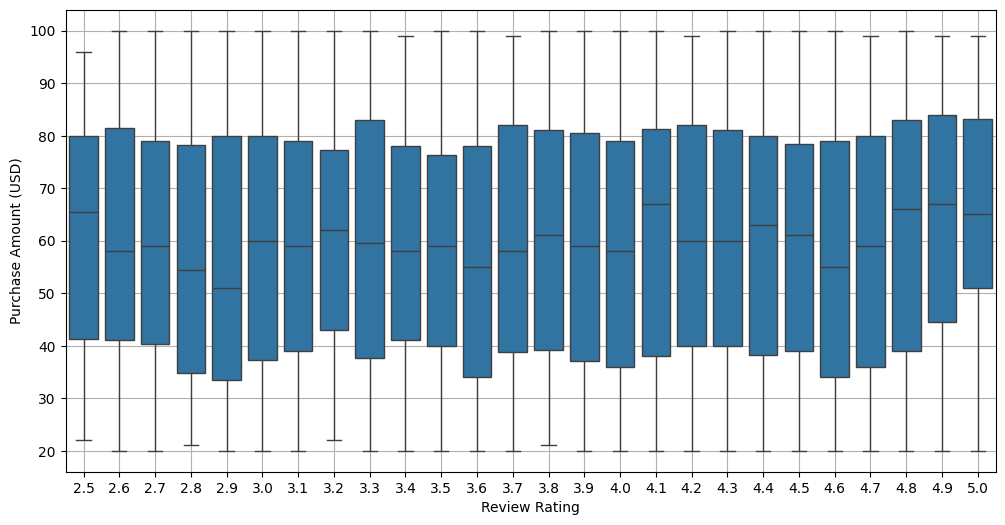

In [103]:
plt.figure(figsize=(12,6))

sns.boxplot(
    data=df,
    x='Review Rating',
    y='Purchase Amount (USD)'
)
plt.grid()
plt.show()

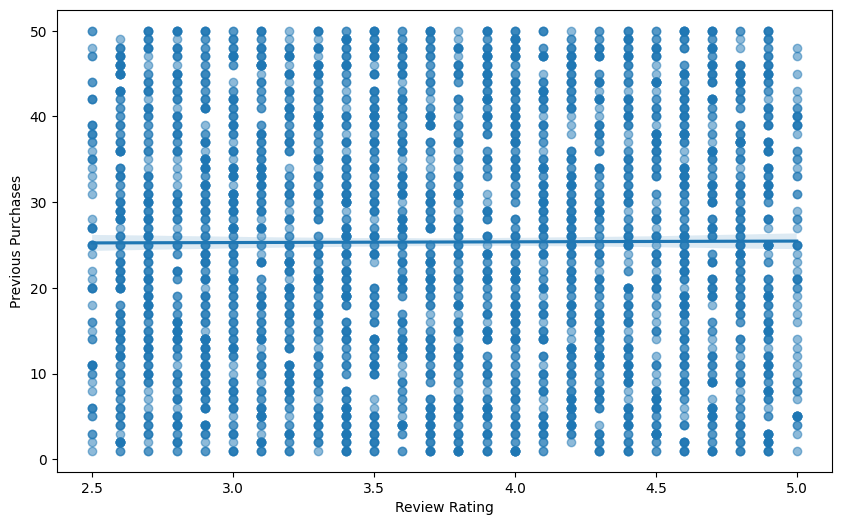

In [104]:
plt.figure(figsize=(10,6))

sns.regplot(
    data=df,
    x='Review Rating',
    y='Previous Purchases',
    scatter_kws={'alpha':0.5}
)
plt.show()

**Insight:**
> Berdasarkan analisis hubungan antara review rating dan perilaku pembelian, tidak terlihat pola hubungan yang jelas antara tingkat rating dengan jumlah previous purchases maupun besarnya purchase amount. Distribusi purchase amount pada setiap tingkat rating relatif serupa, dengan median dan rentang interkuartil yang cenderung konsisten.

> Hal ini mengindikasikan bahwa review rating tidak memiliki keterkaitan yang signifikan terhadap perilaku pembelian pelanggan, baik dari sisi intensitas pembelian maupun nilai transaksi.

#### Metode pembayaran dan tipe pengiriman apa yang paling mendukung transaksi bernilai tinggi?

In [105]:
df[['Payment Method', 'Shipping Type']].describe()

,Payment Method,Shipping Type
count,3900,3900
unique,6,6
top,PayPal,Free Shipping
freq,677,675


Payment Method

In [106]:
avg_payment = df.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False).reset_index()
avg_payment

,Payment Method,Purchase Amount (USD)
0,Debit Card,60.915094
1,Credit Card,60.074516
2,Bank Transfer,59.712418
3,Cash,59.704478
4,PayPal,59.245199
5,Venmo,58.949527


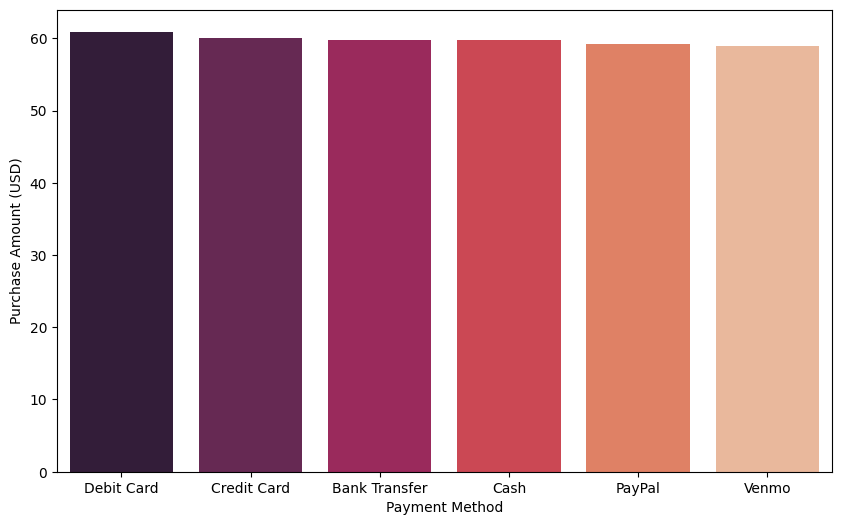

In [107]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=avg_payment,
    x='Payment Method',
    y='Purchase Amount (USD)',
    palette='rocket'
)
plt.show()

Shipping Type

In [108]:
avg_shipping = df.groupby('Shipping Type')['Purchase Amount (USD)'].mean().sort_values(ascending=False).reset_index()
avg_shipping

,Shipping Type,Purchase Amount (USD)
0,2-Day Shipping,60.733652
1,Express,60.475232
2,Free Shipping,60.410370
3,Store Pickup,59.893846
4,Next Day Air,58.631173
5,Standard,58.460245


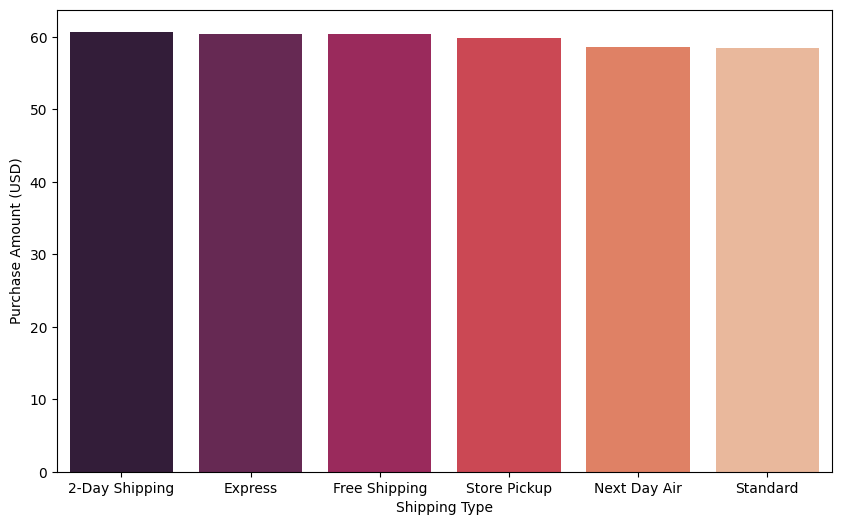

In [109]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=avg_shipping,
    x='Shipping Type',
    y='Purchase Amount (USD)',
    palette='rocket'
)
plt.show()

**Insight:**
> Berdasarkan analisis deskriptif, rata-rata purchase amount antar metode pembayaran dan tipe pengiriman relatif tidak berbeda secara signifikan. Namun demikian, Debit Card dan 2-Day Shipping menunjukkan nilai rata-rata purchase amount yang sedikit lebih tinggi dibandingkan metode dan tipe pengiriman lainnya.

> Hal ini mengindikasikan bahwa meskipun tidak menjadi faktor penentu utama, pemilihan metode pembayaran dan tipe pengiriman tertentu dapat berkorelasi dengan transaksi bernilai relatif lebih tinggi.

In [110]:
df.to_csv("customer_shopping.csv", index=False)

### Dasboard

https://lookerstudio.google.com/reporting/eaac619a-cd71-43ba-b996-06d7cc60295c